In [1]:
import math

In [2]:
DISTS = {}
def dist(c1, c2):
    p = (c1,c2)
    if p in DISTS.keys():
        return DISTS[p]
    else:
        DISTS[p] = ((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)**0.5
        return DISTS[p]
def genGraph(coords):
    edges = []
    costs = []
    for i in coords:
        for j in coords:
            if i==j:
                continue
            d = dist(i,j)
            e = min(coords.index(i), coords.index(j)),max(coords.index(i), coords.index(j))
            if e not in edges:
                edges.append(e)
                costs.append((d,e[0],e[1]))
    graph = {'vertices': [x for x in range(len(coords))],
            'edges' : sorted(costs)}
    return graph
    
def findMST(graph):
    remaining = [x for x in range(1,len(graph['vertices']))]
    NewTree = {'vertices': [0], 'edges' : []}
    
    while remaining:
        for edge in graph['edges']:
            v1, v2 = edge[1], edge[2]
            if v1 in NewTree['vertices'] and v2 in remaining:
                NewTree['vertices'].append(v2)
                remaining.remove(v2)
                NewTree['edges'].append(edge)
                graph['edges'].remove(edge)
                break
            elif v2 in NewTree['vertices'] and v1 in remaining:
                NewTree['vertices'].append(v1)
                remaining.remove(v1)
                NewTree['edges'].append(edge)
                graph['edges'].remove(edge)
                break
    return NewTree


In [12]:
def findPath(test):
    pairs = test.rstrip('\n').split()
    coords = {(int(x),int(y)) for x,y in [p.split(',') for p in pairs]}
    coords = list(coords)
    G = genGraph(coords)
    MST = findMST(G)
    total = math.ceil(sum([x[0] for x in MST['edges']]))
    print(total)
    return(MST)

In [18]:
import random
string = ''
X, Y = [],[]
for i in range(50):
    x = random.randint(-200,200)
    X.append(x)
    y = random.randint(-200,200)
    Y.append(y)
    string += str(x) +',' + str(y) + ' '
M = findPath(string[:-1])

1947


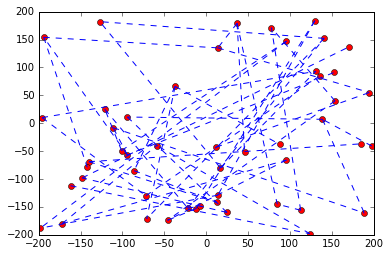

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X,Y,'ro')
for seg in M['edges']:
    a, b = seg[1],seg[2]
    x = X[a], X[b]
    y = Y[a], Y[b]
    plt.plot(x,y,'b--')